In [57]:
"""
ARX Estimation - Tclab

@authors: Jeferson Gallego Chaverra
          Pedro Alejandro Sanchez Osorio
          Victor Alfonso Echeverri Moyano
"""
import numpy as np
import matplotlib.pyplot as plt
import control as cl
import math as ma
import sympy as sym
from sklearn.metrics import *
from Funtions import *

20 25
23.98


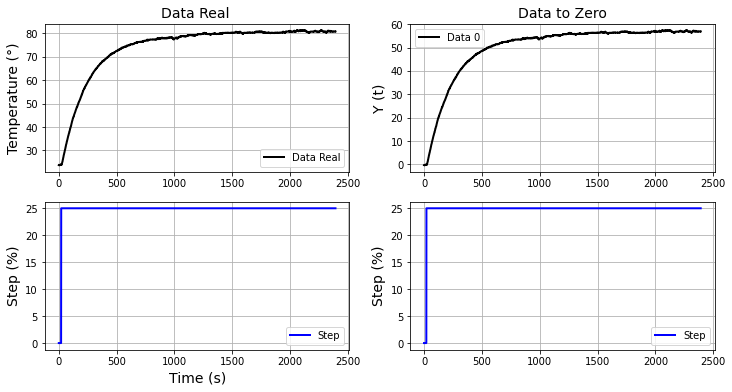

In [58]:
# Upload Data 
x =limites('DATA 1 OR 2?',1,2)

# Data
if x == 1:
     data = np.loadtxt('1.txt',delimiter=',',skiprows=1)
elif x == 2:
     data = np.loadtxt('2.txt',delimiter=',',skiprows=1)

# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T

N = len(y1)
# U
U = int(u1[0])

# Time Zero and Step
for k in range(N):
    if(u1[k]!=U):
        T_Zero = int(t1[k])
        I = int(u1[k])
        print(T_Zero,I)
        break

# Y ---> Time Zero
Z = y1[T_Zero]
print(Z)
y2 = y1 - Z

# Graph
plt.figure(figsize=(12,6))
 
# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Real ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Real')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data to Zero",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data 0')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()

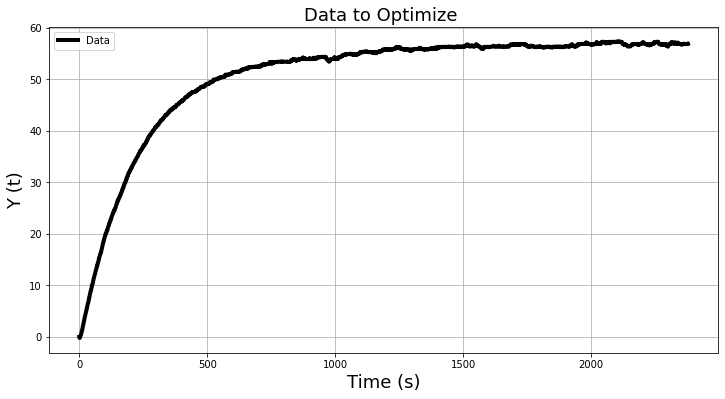

In [59]:
# Simulation Time 
t0 = data[T_Zero:,0].T 
tf = len(t0) - 1
dt = 1
t = np.linspace(0,tf,int(tf/dt)+1)

# Vector Y (t)
y = y2[T_Zero:]
u = u1[T_Zero:]

# Iterations
N=len(y)
       
 # Graph      
plt.figure(figsize=(12,6))
plt.title("Data to Optimize ",fontsize = 18)
plt.plot(t, y, 'k', linewidth=4, label='Data')
plt.ylabel('Y (t)', fontsize = 18)
plt.xlabel('Time (s)', fontsize = 18)
plt.legend(loc='best')
plt.grid()

## Model Ge (z)
$$G_e(z) = \frac{B(z)}{A(z)}$$
$$(1) = \frac{b_1z^{-1}+b_2z^{-2}}{1+a_1z^{-1}+a_{2}z^{-2}}$$
$$(2) = \frac{b_1z^{-1}}{1+a_1z^{-1}+a_{2}z^{-2}}$$
$$(3) = \frac{b_1z^{-1}}{1+a_1z^{-1}}$$
$$(4) = \frac{b_1z^{-1}+b_2z^{-2}}{1+a_1z^{-1}}$$

In [60]:
# Vectors of States

y_1 = np.zeros(N)
y_2 = np.zeros(N)
u_1 = np.zeros(N)
u_2 = np.zeros(N)
    
for k in range(1,N):
    y_1[k]=y[k-1]
    u_1[k]=u[k-1]
for k in range(2,N):
    y_2[k]=y[k-2]
    u_2[k]=u[k-2]
    


## $\phi$ 

In [61]:
x =limites('Ingrese Tipo de Ge',1,4)

## Phi Vector
if x==1:
        phi = np.array([-y_1,-y_2,u_1,u_2]).transpose()
elif x == 2:
        phi = np.array([-y_1,-y_2,u_1,]).transpose()
elif x == 3:
      phi = np.array([-y_1,u_1,]).transpose()
elif x == 4:
      phi = np.array([-y_1,u_1,u_2]).transpose()

##  $\theta$

$$ \theta = (\theta^{T}\theta)^{-1} \theta^{T} yn 

In [62]:
alpha = 0.9
A = np.dot(phi.T,phi) + alpha*np.eye(len(np.dot(phi.T,phi)))
theta = np.dot(np.linalg.inv(A),np.dot(phi.T,y))
theta

array([-0.691401  , -0.30315927, -0.00756058,  0.01981338])

## Polinomial
## Transfer Function
$$G_e(z) = \frac{B(z)}{A(z)}$$

G(z) =     
 -0.007561 z + 0.01981
-----------------------
z^2 - 0.6914 z - 0.3032

dt = 1

Mean Squared Error              =  0.3250
Root Mean Squared Error         =  0.5701
Mean Absolute Error             =  0.4622
Mean Absolute Percentage Error  =  0.0218
R2                              =  0.9975
MAX Error                       =  1.9527


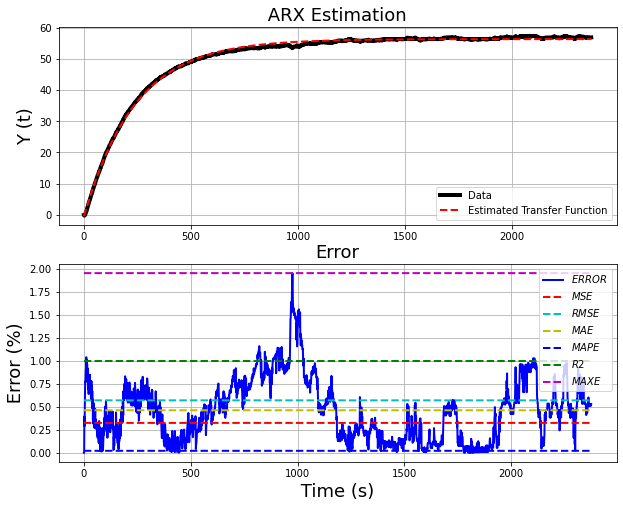

In [63]:
z = sym.symbols('z', complex=True) # z=Simbolo

# Polinomial B(z) / A(z)

if x==1:
       A = 1 + theta[0]*z**-1 + theta[1]*z**-2  
       B = theta[2]*z**-1 + theta[3]*z**-2
elif x == 2:
       A = 1 + theta[0]*z**-1 + theta[1]*z**-2  
       B = theta[2]*z**-1
elif x == 3:
       A = 1 + theta[0]*z**-1
       B = theta[1]*z**-1
elif x ==4:
       A = 1 + theta[0]*z**-1 
       B = theta[1]*z**-1 + theta[2]*z**-2


G = B/A
G = G.simplify()

# Transfer Function Estimation

if x==1:
       #G_1
       G_e = cl.tf([theta[2], theta[3]],[1, theta[0], theta[1]],dt) 
elif x == 2:
       #G_1
       G_e = cl.tf([theta[2]],[1, theta[0], theta[1]],dt)
elif x == 3:
       #G_3
       G_e = cl.tf([theta[1]],[1, theta[0],],dt) 
elif x ==4:
       #G_4
       G_e = cl.tf([theta[1], theta[2]],[1, theta[0]],dt)

# Step Response
_,ye = cl.step_response(G_e,N-4)

ye = ye * I

# Error
e = np.abs(y[0:len(ye)] - ye[0:len(ye)])

y[0:len(ye)]-ye[0:len(ye)]

# Evaluation Criteria 
MSE = mean_squared_error(y[0:len(ye)], ye[0:len(ye)])
RMSE=ma.sqrt(MSE)
MAE = mean_absolute_error(y[0:len(ye)], ye[0:len(ye)])
MAPE = mean_absolute_percentage_error(y[0:len(ye)], ye[0:len(ye)])
R2 = r2_score(y[0:len(ye)], ye[0:len(ye)])
MAXE = max_error(y[0:len(ye)], ye[0:len(ye)])

# Print
print(f"G(z) =     {G_e}") 
print(f"Mean Squared Error              =  {MSE:.4f}")
print(f"Root Mean Squared Error         =  {RMSE:.4f}")
print(f"Mean Absolute Error             =  {MAE:.4f}")
print(f"Mean Absolute Percentage Error  =  {MAPE:.4f}")
print(f"R2                              =  {R2:.4f}")
print(f"MAX Error                       =  {MAXE:.4f}")


# Graph
mse = np.ones(int(len(t)))*MSE 
rmse = np.ones(int(len(t)))*RMSE
mae = np.ones(int(len(t)))*MAE 
mape = np.ones(int(len(t)))*MAPE 
r2 = np.ones(int(len(t)))*R2 
maxe = np.ones(int(len(t)))*MAXE 

# Plot
plt.figure(figsize=(10,8))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title(" ARX Estimation ",fontsize = 18)
plt.plot(t1[0:len(ye)],y[0:len(ye)],'k', linewidth=4, label='Data')
plt.plot(t1[0:len(ye)],ye[0:len(ye)], 'r--', linewidth=2, label='Estimated Transfer Function')
plt.ylabel('Y (t)', fontsize = 18)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 18)
plt.plot(t[0:len(ye)],e[0:len(ye)],  'b-'  , linewidth=2, label=r'$ERROR$')
plt.plot(t[0:len(ye)],mse[0:len(ye)],  'r--'  , linewidth=2, label=r'$MSE$')
plt.plot(t[0:len(ye)],rmse[0:len(ye)],  'c--'  , linewidth=2, label=r'$RMSE$')
plt.plot(t[0:len(ye)],mae[0:len(ye)],  'y--'  , linewidth=2, label=r'$MAE$')
plt.plot(t[0:len(ye)],mape[0:len(ye)],  'b--'  , linewidth=2, label=r'$MAPE$')
plt.plot(t[0:len(ye)],r2[0:len(ye)],  'g--'  , linewidth=2, label=r'$R2$')
plt.plot(t[0:len(ye)],maxe[0:len(ye)],  'm--'  , linewidth=2, label=r'$MAXE$')

plt.ylabel(' Error (%) ', fontsize = 18)
plt.xlabel(' Time (s) ', fontsize = 18)
plt.legend(loc='best')
plt.show()